# Author: Fang Jung(Kristy) Lin
# Purpose: Data visualization and story telling of the college major data

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import random
import os

from matplotlib import pyplot as plt
import pylab as pl
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

## Purpose for the analysis

- Tell the story behind the data during the procress of data exploratory
  


# Part1. Data Acquisition and Preprocessing

## Data Acquisition

The actual path to downloadable CSV is

- all_ages: https://docs.google.com/spreadsheets/d/e/2PACX-1vRkOp5y7zYfsPOXwDjdWzxpZgc5YVftEi4ucD0eF5Vy0htRYhx1gCY2MM_8PgWuIVtGShZJ1DT2qJSt/pub?gid=1367918213&single=true&output=csv
- grad_students: https://docs.google.com/spreadsheets/d/e/2PACX-1vQ47oUMirPWCHWvq4ypZfJ1Ov98HtzK3uVDOQfZzGJvHV3T8JIfK9IBcH50_pduSy9PP4yI2aeud4k-/pub?gid=865085628&single=true&output=csv
- majors_list: https://docs.google.com/spreadsheets/d/e/2PACX-1vRcstsouAQ86JlpLilB17_j3GhKfbbHnswqrH5L_IcXvw5D_izs5TF4_hHsdX89SFxAmh7cTntS6wOi/pub?gid=356412661&single=true&output=csv
- recent_grads: https://docs.google.com/spreadsheets/d/e/2PACX-1vTTFmJNWs66PEnmeJWSiJSTTtxZFhU4EBMYPulAIiqNOkxPXlHZmf1bcL9z_ZrJO1sgR7dHtGHe_Y1E/pub?gid=1608104363&single=true&output=csv
- women_stem: https://docs.google.com/spreadsheets/d/e/2PACX-1vRGdK4HJ4K23RGpIM3VNQzIKHNYBNUBIa3EY9aC0jRKjSTjPpAke6ivf-HImDl-CsCI_CUtNwyZKl8c/pub?gid=932095321&single=true&output=csv

## Data exploratory

First, read data from Google sheet and explore each data frame

Second, join the dataframe together

### all_ages dataframe

In [2]:
all_ages = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRkOp5y7zYfsPOXwDjdWzxpZgc5YVftEi4ucD0eF5Vy0htRYhx1gCY2MM_8PgWuIVtGShZJ1DT2qJSt/pub?gid=1367918213&single=true&output=csv'
all_ages_df = pd.read_csv(all_ages)

all_ages_df.head(1)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0


### grad_students dataframe

In [3]:
grad_students = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ47oUMirPWCHWvq4ypZfJ1Ov98HtzK3uVDOQfZzGJvHV3T8JIfK9IBcH50_pduSy9PP4yI2aeud4k-/pub?gid=865085628&single=true&output=csv'
grad_students_df = pd.read_csv(grad_students)

grad_students_df.head(1)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.09632,0.153846


### majors_list dataframe

In [4]:
majors_list = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRcstsouAQ86JlpLilB17_j3GhKfbbHnswqrH5L_IcXvw5D_izs5TF4_hHsdX89SFxAmh7cTntS6wOi/pub?gid=356412661&single=true&output=csv'
majors_list_df = pd.read_csv(majors_list)

majors_list_df.head(1)

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources


### recent_grads dataframe

In [5]:
recent_grads = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTTFmJNWs66PEnmeJWSiJSTTtxZFhU4EBMYPulAIiqNOkxPXlHZmf1bcL9z_ZrJO1sgR7dHtGHe_Y1E/pub?gid=1608104363&single=true&output=csv'
recent_grads_df = pd.read_csv(recent_grads)

recent_grads_df.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


### women_stem dataframe

In [6]:
women_stem = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRGdK4HJ4K23RGpIM3VNQzIKHNYBNUBIa3EY9aC0jRKjSTjPpAke6ivf-HImDl-CsCI_CUtNwyZKl8c/pub?gid=932095321&single=true&output=csv'
women_stem_df = pd.read_csv(women_stem)

women_stem_df.head(1)

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000


### Data interpretion

The main tables I'm going to put together are all-ages, grad_students, recent_grads on Major_code, since major_code is the primary key in each table.

The reason that I don't join major_list and women_stem is that they are the splits of other tables. Hence, I don't need to join them into the new table again.

## Merge the data and create a new dataframe

### Drop the unnecessary columns

In this step, I drop out the columns that I won't use in my analysis.

In [7]:
# Drop unnecessary columns from grad_students_df
grad_students_df = grad_students_df.drop(['Grad_sample_size'], axis=1)
list(grad_students_df)

['Major_code',
 'Major',
 'Major_category',
 'Grad_total',
 'Grad_employed',
 'Grad_full_time_year_round',
 'Grad_unemployed',
 'Grad_unemployment_rate',
 'Grad_median',
 'Grad_P25',
 'Grad_P75',
 'Nongrad_total',
 'Nongrad_employed',
 'Nongrad_full_time_year_round',
 'Nongrad_unemployed',
 'Nongrad_unemployment_rate',
 'Nongrad_median',
 'Nongrad_P25',
 'Nongrad_P75',
 'Grad_share',
 'Grad_premium']

In [8]:
# Drop unnecessary columns from recent_grads_df
recent_grads_df = recent_grads_df.drop(['ShareWomen', 'Sample_size'], axis=1)
list(recent_grads_df)

['Rank',
 'Major_code',
 'Major',
 'Total',
 'Men',
 'Women',
 'Major_category',
 'Employed',
 'Full_time',
 'Part_time',
 'Full_time_year_round',
 'Unemployed',
 'Unemployment_rate',
 'Median',
 'P25th',
 'P75th',
 'College_jobs',
 'Non_college_jobs',
 'Low_wage_jobs']

### Put all together

In [9]:
merged_df = pd.merge(all_ages_df, grad_students_df, on=['Major_code','Major', 'Major_category'])
merged_df = pd.merge(merged_df, recent_grads_df, on=['Major_code','Major', 'Major_category'])

merged_df.head(1)

,Major_code,Major,Major_category,Total_x,Employed_x,Employed_full_time_year_round,Unemployed_x,Unemployment_rate_x,Median_x,P25th_x,...,Part_time,Full_time_year_round,Unemployed_y,Unemployment_rate_y,Median_y,P25th_y,P75th_y,College_jobs,Non_college_jobs,Low_wage_jobs
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,...,2031,5888,178,0.019642,40000,30000,50000,2418,4717,839


In [10]:
list(merged_df)

['Major_code',
 'Major',
 'Major_category',
 'Total_x',
 'Employed_x',
 'Employed_full_time_year_round',
 'Unemployed_x',
 'Unemployment_rate_x',
 'Median_x',
 'P25th_x',
 'P75th_x',
 'Grad_total',
 'Grad_employed',
 'Grad_full_time_year_round',
 'Grad_unemployed',
 'Grad_unemployment_rate',
 'Grad_median',
 'Grad_P25',
 'Grad_P75',
 'Nongrad_total',
 'Nongrad_employed',
 'Nongrad_full_time_year_round',
 'Nongrad_unemployed',
 'Nongrad_unemployment_rate',
 'Nongrad_median',
 'Nongrad_P25',
 'Nongrad_P75',
 'Grad_share',
 'Grad_premium',
 'Rank',
 'Total_y',
 'Men',
 'Women',
 'Employed_y',
 'Full_time',
 'Part_time',
 'Full_time_year_round',
 'Unemployed_y',
 'Unemployment_rate_y',
 'Median_y',
 'P25th_y',
 'P75th_y',
 'College_jobs',
 'Non_college_jobs',
 'Low_wage_jobs']

Below, I will use the information of these columns to conduct the analysis.

# Part2. Data Exploration

##  Major and Sex

People always get curious about what major has the most propotion of women and men. Let's take a look on it!

### Show the percentile of women in each major

In [11]:
sex_df = merged_df[['Major','Total_y', 'Men','Women']]
sex_df['Women_Percentile'] = sex_df['Women']/sex_df['Total_y']
sex_df['Men_Percentile'] = sex_df['Men']/sex_df['Total_y']
sex_df = sex_df.sort_values('Women_Percentile', ascending=False)
sex_df.head(1)

/Users/kristylin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kristylin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Major,Total_y,Men,Women,Women_Percentile,Men_Percentile
31,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,0.968954,0.031046


#### From the table, we can find that EARLY CHILDHOOD EDUCATION has the highest proportion of women among all majors.

### Visualize the major with the highest proportion of women

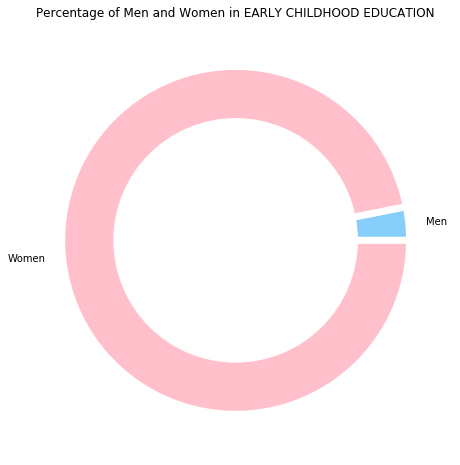

In [12]:
# create data
names= 'Men', 'Women'
size = [1167, 36422]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Plot the result
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
ax.pie(size, labels=names, colors=['lightskyblue', 'pink'], 
       wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
ax.set_title('Percentage of Men and Women in EARLY CHILDHOOD EDUCATION')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Show the percentile of men in each major

In [13]:
sex_df['Men_Percentile'] = sex_df['Men']/sex_df['Total_y']
sex_df = sex_df.sort_values('Men_Percentile', ascending=False)
sex_df.head(1)

,Major,Total_y,Men,Women,Women_Percentile,Men_Percentile
93,MILITARY TECHNOLOGIES,124.0,124.0,0.0,0.0,1.0


#### From the table, we can find that MILITARY TECHNOLOGIES	 has the highest proportion of men among all majors.

### Visualize the major with the highest proportion of men

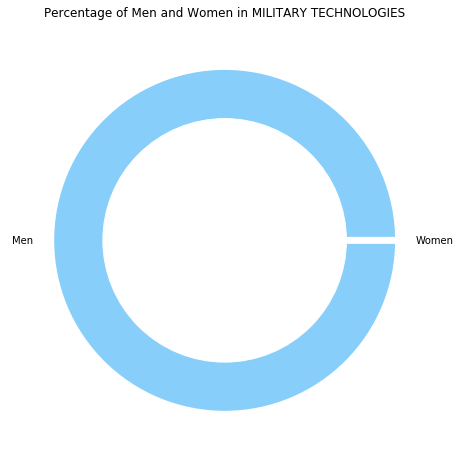

In [14]:
# create data
names1= 'Men', 'Women'
size1 = [124, 0]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Plot the result
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
ax.pie(size1, labels=names1, colors=['lightskyblue', 'pink'], 
       wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
ax.set_title('Percentage of Men and Women in MILITARY TECHNOLOGIES')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### As we can see from the result, there are no women in military technologies

## Majors with students

### Majors with top 5 amount of students

In [15]:
major_df = merged_df[['Major','Total_y']]
major_df = major_df.sort_values('Total_y', ascending=False)
plot_df = major_df.head()
plot_df

,Major,Total_y
114,PSYCHOLOGY,393735.0
161,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0
78,BIOLOGY,280709.0
158,GENERAL BUSINESS,234590.0
13,COMMUNICATIONS,213996.0


### Visualize the result

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

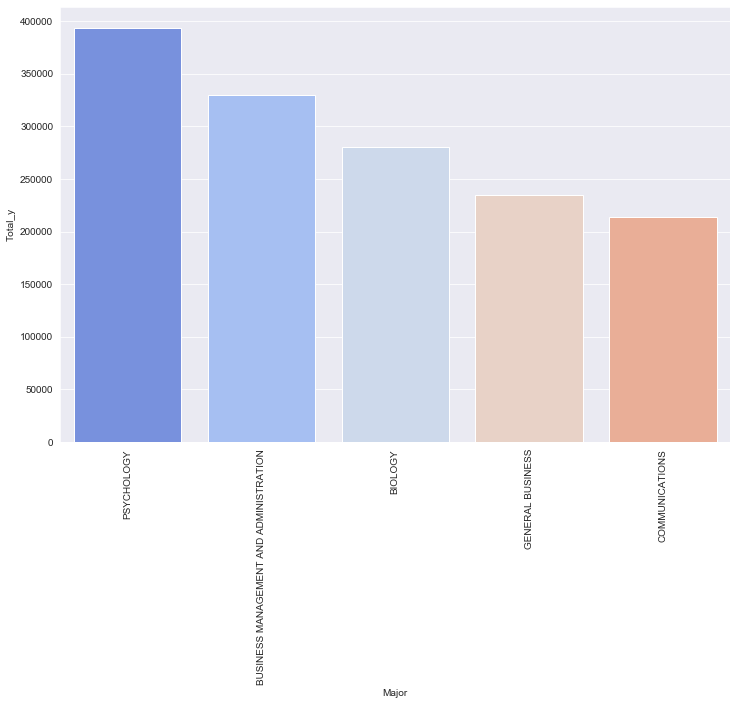

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Major', y = 'Total_y', data = plot_df.sort_values(by = 'Total_y', ascending = False),
                  capsize = None, palette = sns.color_palette('coolwarm'), orient = 'v')
plt.xticks(rotation=90)

#### As we can see from the graphs, among all majors, most students choose PSYCHOLOGY, BUSINESS MANAGEMENT AND ADMINISTRATION, BIOLOGY, GENERAL BUSINESS, and COMMUNICATIONS as their majors.

## Majors with low wage job

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

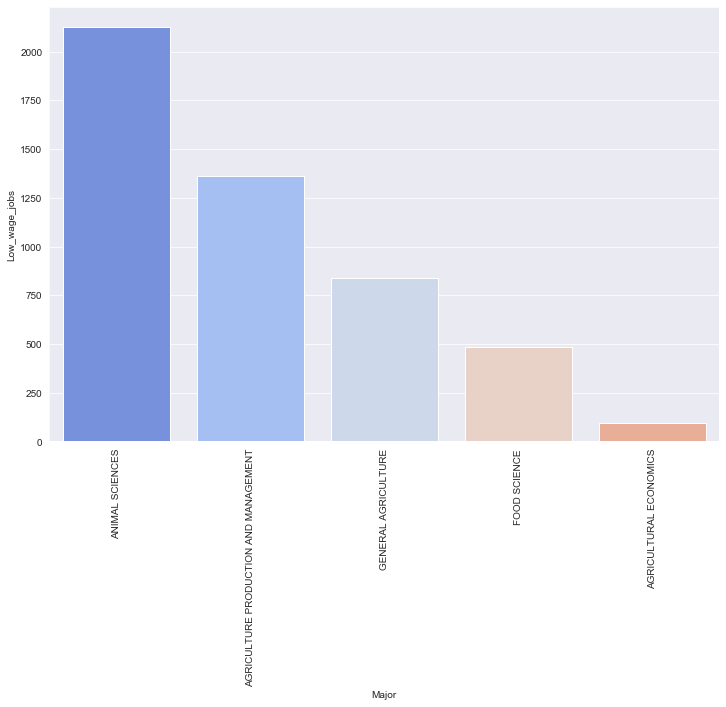

In [17]:
low_df = merged_df[['Major', 'Low_wage_jobs']]
low_df = low_df.head(5)

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Major', y = 'Low_wage_jobs', data = low_df.sort_values(by = 'Low_wage_jobs', ascending = False),
                  capsize = None, palette = sns.color_palette('coolwarm'), orient = 'v')
plt.xticks(rotation=90)

As we can see from the plot, agricultural economics has the lowest pay among all majors.

## Major categories with Salary

### Find the major categories

In [18]:
merged_df.Major_category.unique()

array(['Agriculture & Natural Resources', 'Biology & Life Science',
       'Engineering', 'Humanities & Liberal Arts',
       'Communications & Journalism', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Education',
       'Law & Public Policy', 'Interdisciplinary', 'Health',
       'Social Science', 'Physical Sciences', 'Psychology & Social Work',
       'Arts', 'Business'], dtype=object)

### Plot the result

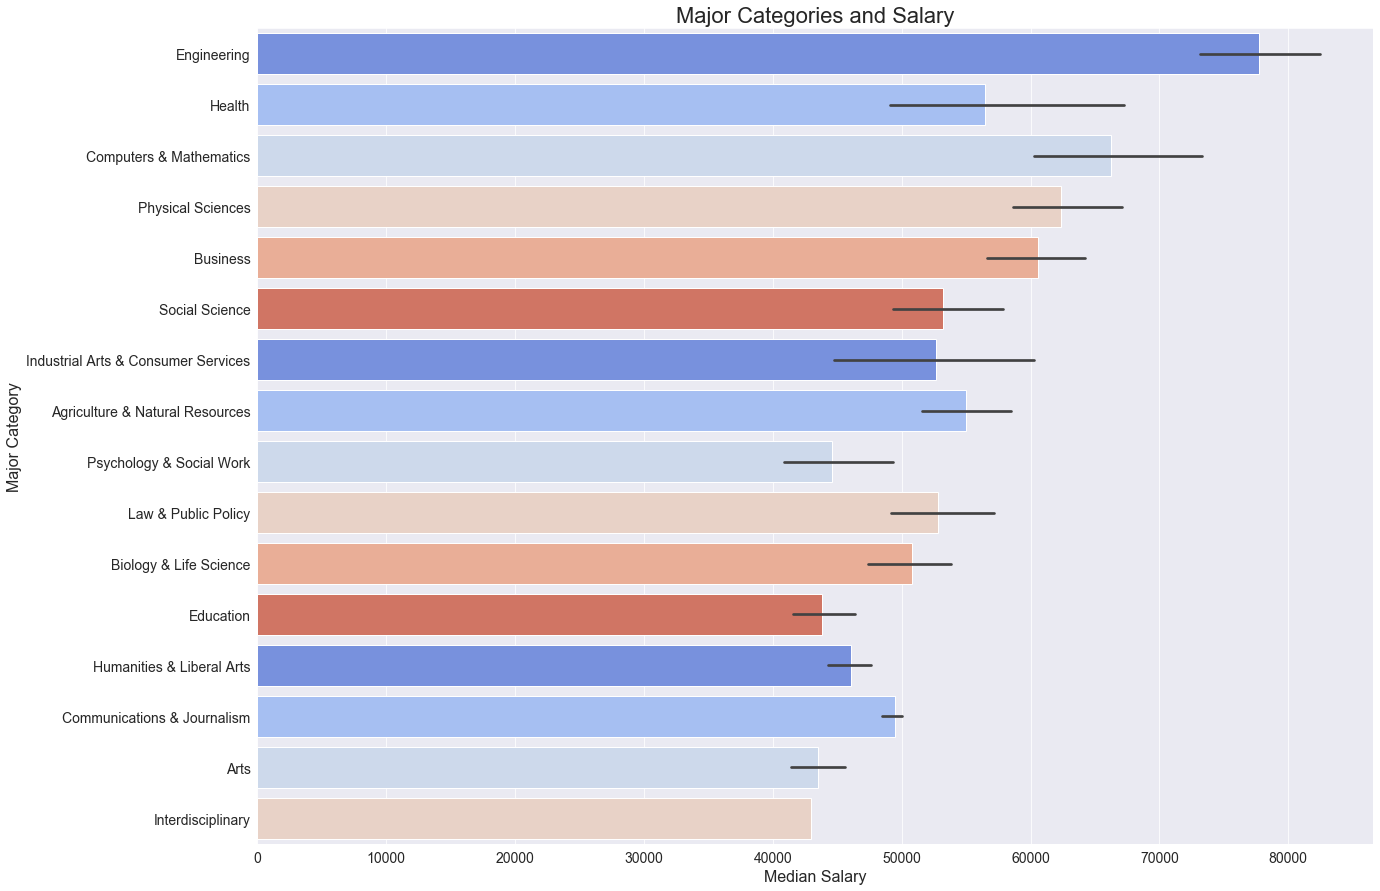

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
ax = sns.barplot(x = 'Median_x', y = 'Major_category', data = merged_df.sort_values(by = 'Median_x', ascending = False),
                  capsize = None, palette = sns.color_palette('coolwarm'), orient = 'h')

ax.set_title('Major Categories and Salary', fontsize=22)
ax.set_xlabel('Median Salary', fontsize=16)
ax.set_ylabel('Major Category', fontsize=16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

As we can see from the bar plot, Engineering gets the highest median salary among all major categories.

Interdisciplinary gets the lowest median salary among all major categories.

### Find the majors in Engineering major category

In [20]:
merged_df[merged_df['Major_category'] == 'Engineering'].Major.unique()

array(['ARCHITECTURE', 'GENERAL ENGINEERING', 'AEROSPACE ENGINEERING',
       'BIOLOGICAL ENGINEERING', 'ARCHITECTURAL ENGINEERING',
       'BIOMEDICAL ENGINEERING', 'CHEMICAL ENGINEERING',
       'CIVIL ENGINEERING', 'COMPUTER ENGINEERING',
       'ELECTRICAL ENGINEERING',
       'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
       'ENVIRONMENTAL ENGINEERING',
       'GEOLOGICAL AND GEOPHYSICAL ENGINEERING',
       'INDUSTRIAL AND MANUFACTURING ENGINEERING',
       'MATERIALS ENGINEERING AND MATERIALS SCIENCE',
       'MECHANICAL ENGINEERING', 'METALLURGICAL ENGINEERING',
       'MINING AND MINERAL ENGINEERING',
       'NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'NUCLEAR ENGINEERING',
       'PETROLEUM ENGINEERING', 'MISCELLANEOUS ENGINEERING',
       'ENGINEERING TECHNOLOGIES',
       'ENGINEERING AND INDUSTRIAL MANAGEMENT',
       'ELECTRICAL ENGINEERING TECHNOLOGY',
       'INDUSTRIAL PRODUCTION TECHNOLOGIES',
       'MECHANICAL ENGINEERING RELATED TECHNOLOGIES',
       'MISCELLANE

### Plot each major's median salary in Engineering category

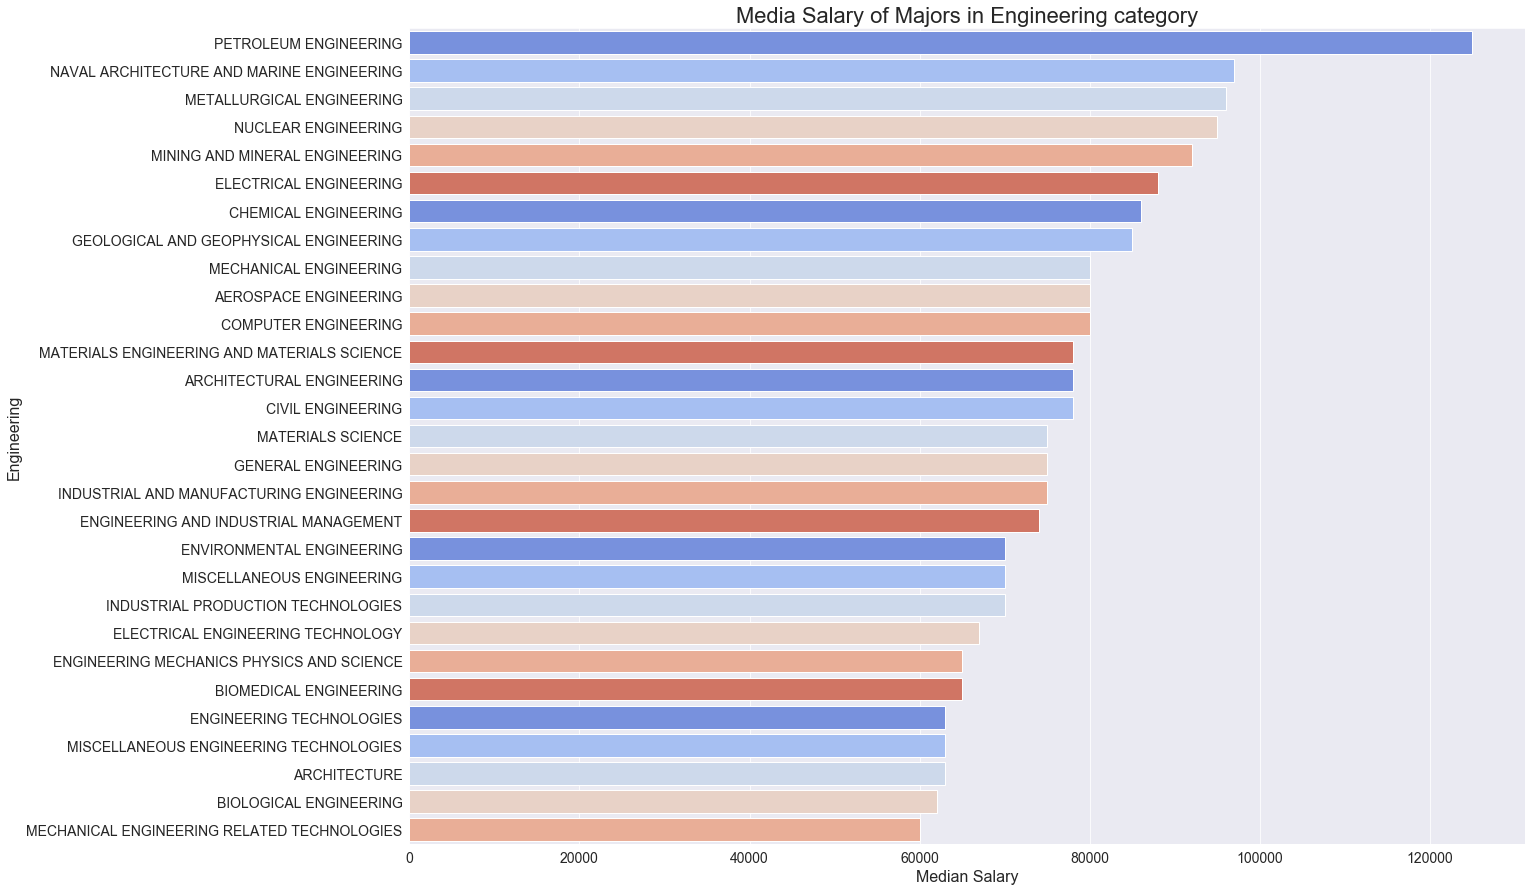

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
ax = sns.barplot(x = 'Median_x', y = 'Major', data = merged_df[merged_df['Major_category'] == 'Engineering'].sort_values(by = 'Median_x', ascending = False),
                  capsize = None, palette = sns.color_palette('coolwarm'), orient = 'h')

ax.set_title('Media Salary of Majors in Engineering category', fontsize=22)
ax.set_xlabel('Median Salary', fontsize=16)
ax.set_ylabel('Engineering', fontsize=16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

From the graph, we can say that not all the majors in Engineering category have high salary.
As we can see, the petroleum have the significantly highest salary. However, architecture, biological engineering and mechanical engineering related technologies have relatively lower salary.

Let's have a deeper look to find out the median salary for all ages.

In [22]:
print('Average median salary among all ages:', merged_df['Median_x'].mean())

Average median salary among all ages: 56816.184971098264


From the result of average median salary among all ages, we can conclude that not all the majors in Engineering category have the higher pay. There are still some subjects have the average median salary.

## Highest employed rate/ unemployed rate among all majors

In this step, I will take a look on recent_grad students. To find out which major has the highest/lowest employment and unemployment rate.

### Major with the highest employed rate

/Users/kristylin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


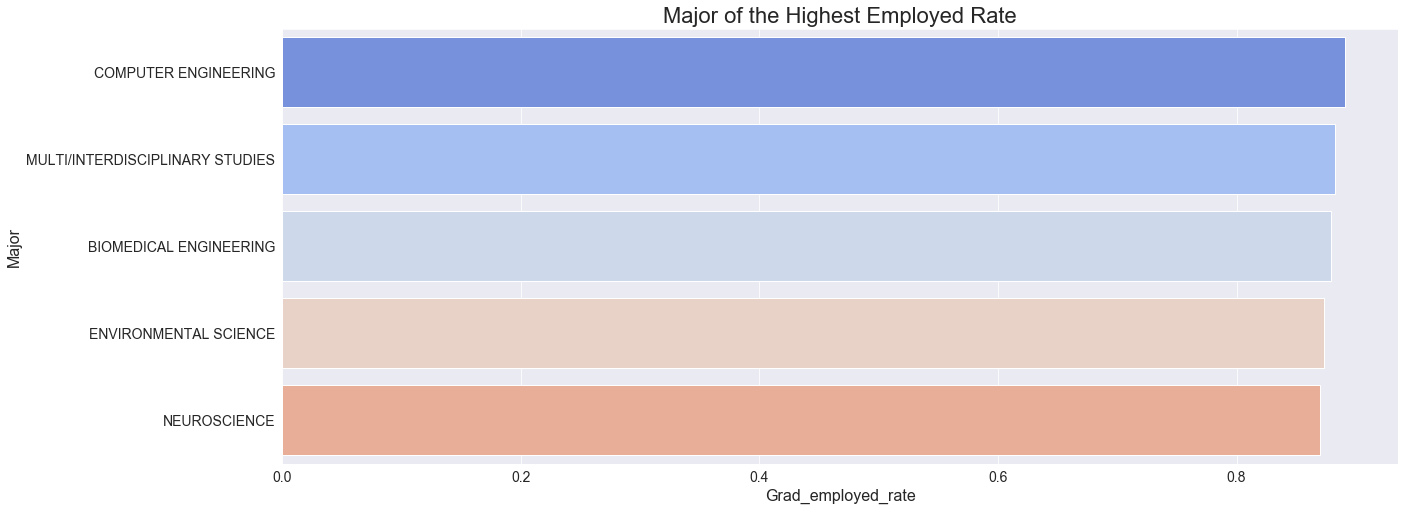

In [23]:
employed_df = merged_df[['Major', 'Grad_total', 'Grad_employed']]
employed_df['Employed_rate'] = employed_df['Grad_employed'] / employed_df['Grad_total']
employed_df = employed_df.sort_values('Employed_rate', ascending=False)

# Plot the result
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
ax = sns.barplot(x = 'Employed_rate', y = 'Major', data = employed_df[0:5],
                 capsize = None, palette = sns.color_palette('coolwarm'), orient = 'h')

# Set the title and label
ax.set_title('Major of the Highest Employed Rate', fontsize=22)
ax.set_xlabel('Grad_employed_rate', fontsize=16)
ax.set_ylabel('Major', fontsize=16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

We can find that COMPUTER ENGINEERING has the highest employed rate among recent grad students which is higher than 80%.

### Major with the highest unemployed rate

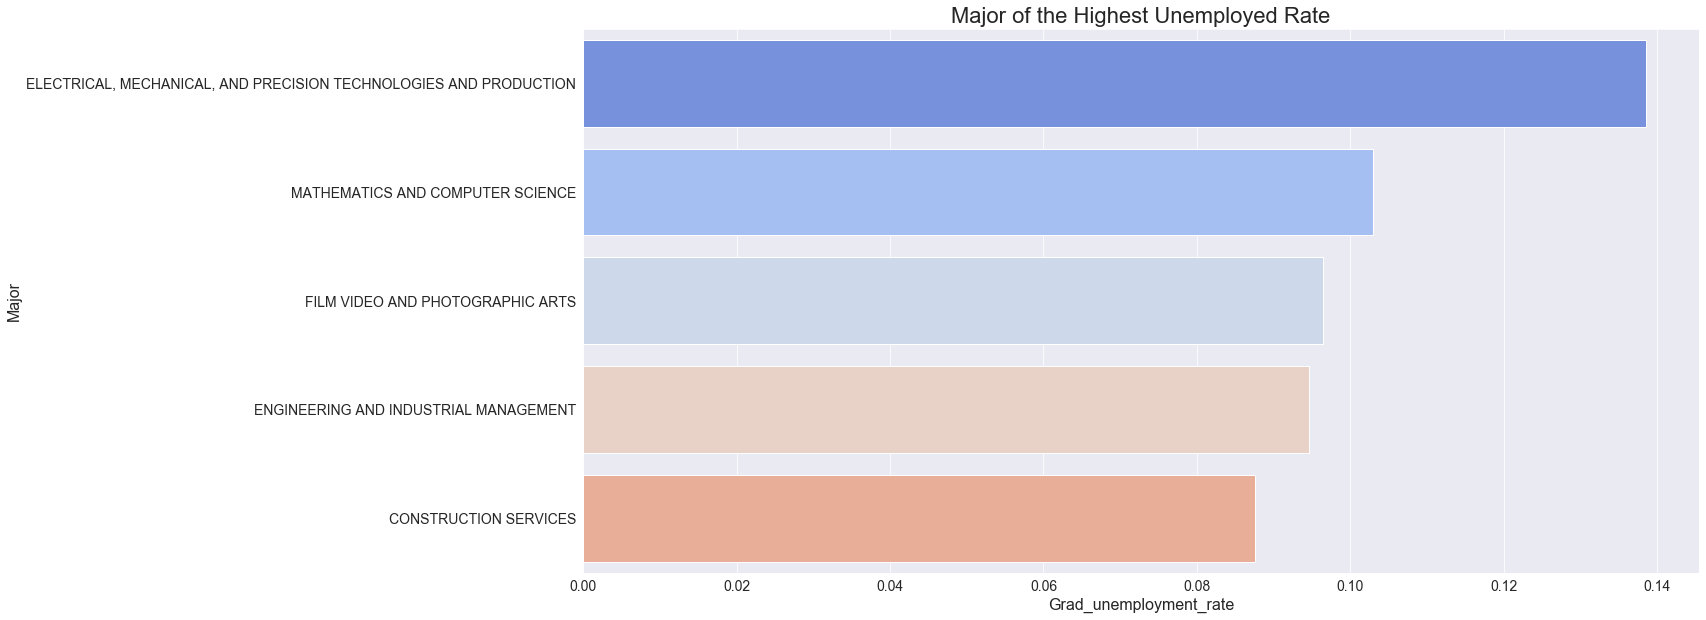

In [24]:
# Create a dataframe
unemployed_df = merged_df[['Major', 'Grad_unemployment_rate']].sort_values('Grad_unemployment_rate', ascending=False)

# Plot the result
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'Grad_unemployment_rate', y = 'Major', data = unemployed_df[0:5],
                 capsize = None, palette = sns.color_palette('coolwarm'), orient = 'h')

# Set the title and label
ax.set_title('Major of the Highest Unemployed Rate', fontsize=22)
ax.set_xlabel('Grad_unemployment_rate', fontsize=16)
ax.set_ylabel('Major', fontsize=16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

From the recent grad students, we can find that ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION major has the highest unemployed rate which is almost 14%.

## Correlation between salary and employment/ unemployment rate

/Users/kristylin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


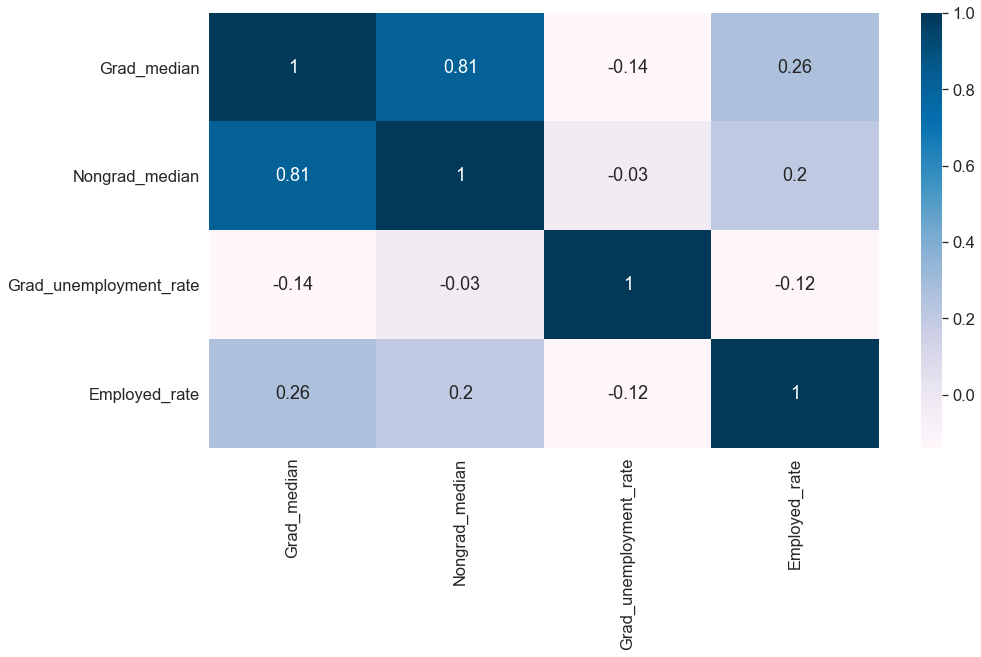

In [25]:
# Create a dataframe
corr_df = merged_df[['Grad_median','Nongrad_median', 'Grad_unemployment_rate','Grad_employed','Grad_total']]
corr_df['Employed_rate'] = corr_df['Grad_employed'] / corr_df['Grad_total']
corr_df = corr_df[['Grad_median','Nongrad_median', 'Grad_unemployment_rate','Employed_rate']]

# Plot the heatmap
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr_df.corr(), annot=True, cmap = 'PuBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=90)
plt.show()

From the heat map above, we can find the result.

- The correlation between salary and employment/ unemployment is weak.

We can say that even though we get the high salary, it does not mean we also can have the higher employed rate.
Or, if we get the low salary, it does not mean the umemployed rate will be higher.

## Proportion of Men and Women take part in STEM majors

I would like to know the propotion of men and women who took part in the STEM majors

Text(0.5, 1.0, 'Percentage of Men and Women in STEM')

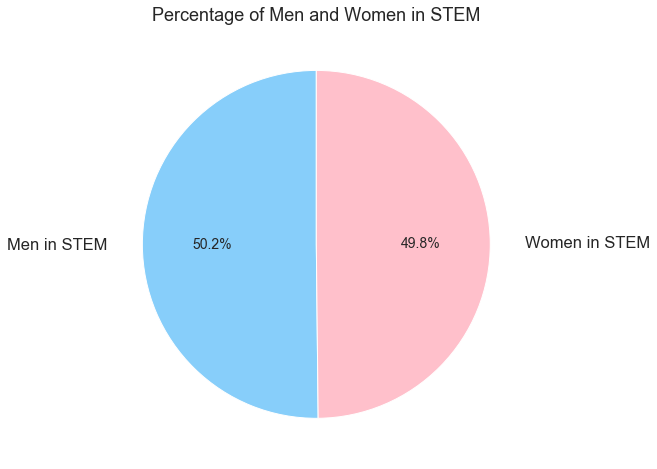

In [26]:
# Create a data frame
women_stem_df[['Total', 'Men', 'Women']]

# Compute the percentage of men in total
men_total = women_stem_df['Men'].sum() 
women_total = women_stem_df['Women'].sum() 
sizes = [men_total, women_total]
fig, ax = plt.subplots(figsize=(15,8))

# set font size. 
plt.rcParams['font.size']=14

# set color palette.
color_palette_list = ['lightskyblue', 'pink']

# make a pie chart. 
labels = ['Men in STEM', 'Women in STEM']
ax.pie(sizes, colors = color_palette_list,labels=labels, autopct='%1.1f%%',
        shadow = False, startangle = 90,labeldistance = 1.2)
ax.set_title('Percentage of Men and Women in STEM', fontsize = 18)

As we can see from the pie chart, the proportion of men and women in STEM is similiar. In common, people may think there are more men taking part in STEM majors. However, from the result, it seems that there are many women taking part in STEM majors, too.

## Relation between STEM and salary 

### Find the average median salary of STEM and non-STEM recent grad students

In [27]:
# Merge the dataframe
new_merge_df = pd.merge(recent_grads_df, women_stem_df, on=['Major_code'])

# Find the average median salary among STEM recent grad students
stem_med_salary = new_merge_df['Median_y'].mean()
print('STEM avg median salary:', stem_med_salary)

# Find the dataframe of non_STEM majors recent grad students
non_stem_df = recent_grads_df[(~recent_grads_df.Major_code.isin(new_merge_df.Major_code))]

# Find the average median salary among non-STEM recent grad students
non_stem_med_salary = non_stem_df['Median'].mean()
print('Non-STEM avg median salary:', non_stem_med_salary)


STEM avg median salary: 46118.42105263158
Non-STEM avg median salary: 35476.28865979381


As we can see from the result, we can find:

- STEM majors recent grad students truely can have a higher average median salary than non-STEM majors.

### Visualize the result

Text(0.5, 1.0, 'Distribution of Salary between Non-stem majors and STEM majors')

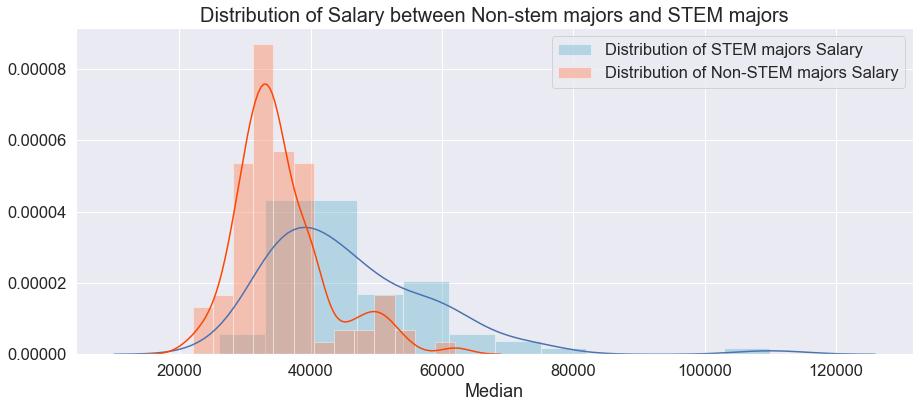

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(new_merge_df['Median_y'], hist_kws={'color':'c'},
                     kde_kws={'color':'b'})
ax = sns.distplot(non_stem_df['Median'], hist=True, hist_kws={'color':'coral'}, kde_kws={'color':'orangered'})
plt.legend(['Distribution of STEM majors Salary','Distribution of Non-STEM majors Salary'])
ax.set_title('Distribution of Salary between Non-stem majors and STEM majors', fontsize=20)

As we can see from the result, we can find:

- STEM majors recent grad students truely can have a higher average median salary than non-STEM majors.

## Relation between STEM and unemployment rate

### Find the average unemployment rate of STEM and non-STEM recent grad students

In [29]:
# Find the average unemployment rate among STEM recent grad students
stem_avg_unem = new_merge_df['Unemployment_rate'].mean()
print('STEM avg unemployment rate:', stem_avg_unem)

# Find the average unemployment rate among non-STEM recent grad students
non_stem_avg_unem = non_stem_df['Unemployment_rate'].mean()
print('Non-STEM avg unemployment rate:', non_stem_avg_unem)

STEM avg unemployment rate: 0.06411183874999998
Non-STEM avg unemployment rate: 0.07138674229896906


### Visualize the result

Text(0.5, 1.0, 'Distribution of unemployment rate between Non-stem majors and STEM majors')

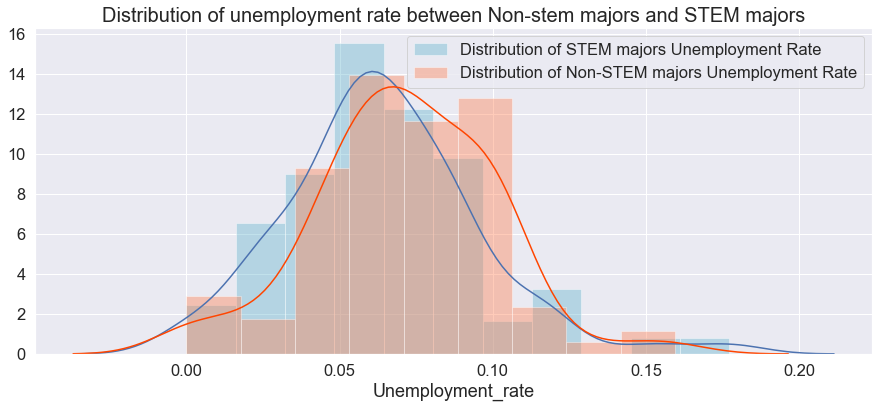

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
ax = sns.distplot(new_merge_df['Unemployment_rate'], hist_kws={'color':'c'},
                     kde_kws={'color':'b'})
ax = sns.distplot(non_stem_df['Unemployment_rate'], hist=True, hist_kws={'color':'coral'}, kde_kws={'color':'orangered'})
plt.legend(['Distribution of STEM majors Unemployment Rate','Distribution of Non-STEM majors Unemployment Rate'])
ax.set_title('Distribution of unemployment rate between Non-stem majors and STEM majors', fontsize=20)

As we can see from the result, we can find:

- The unemployment rate has minor relation between STEM and non-STEM, the difference between them is not significant

- Although students who take part in STEM majors can have a higher average median salary, it does not mean the students can have a lower unemployment rate

# Part3. Summary

From the analysis and visualizations above, we can come up with below summarys

1. Major with the highest proportion of women/men


- EARLY CHILDHOOD EDUCATION has the highest proportion of women among all majors

- Military Technologies has the highest proportion of men among all majors


2. Majors with top5 amount students


- Among all majors, most students choose PSYCHOLOGY, BUSINESS MANAGEMENT AND ADMINISTRATION, BIOLOGY, GENERAL BUSINESS, and COMMUNICATIONS as their majors



3. Majors with low wage job


- Agricultural economics has the lowest pay among all majors.



4. What major category has the highest salary? Do all the major in that category also have a higher average pay than others?


- Engineering has the highest salary.

- Not all the majors in Engineering category also have a higher average pay than other majors. There are still some majors have lower than average salary.


5. Major with the highest employed rate/ unemployed rate


- COMPUTER ENGINEERING has the highest employed rate among recent grad students which is higher than 80%.

- From the recent grad students, ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION major has the highest unemployed rate which is almost 14%.


6. Correlation between salary and employment/ unemployment rate


- The correlation between salary and employment/ unemployment is weak.

- We can say that even though we get the high salary, it does not mean we also can have the higher employed rate. Or, if we get the low salary, it does not mean the umemployed rate will be higher.


7. The proportion that men and women take part in STEM majors


- Men:50.2%

- Women: 49.8%

- The proportion of men and women in STEM is similiar. In common, people may think there are more men taking part in STEM majors. However, from the result, it seems that there are many women taking part in STEM majors, too.


8. Could students get a higher salary by taking part in STEM majors? Or, do the STEM students have a lower unemployment rate?


- STEM majors recent grad students truely can have a higher average median salary than non-STEM majors, which is 46118 and 35476

- The unemployment rate has minor relation between STEM and non-STEM

- Although students who take part in STEM majors can have a higher average median salary, it does not mean the students can have a lower unemployment rate



9. Is there really a strong relation between major and employment or salary?


- From the outcomes above, we can conclude that there is a relation between major and salary but the relation between major and employment is minor. Hence, if the students are confused by what majors to choose, they should follow their interests. It's the most important, the majors they choose cannot tell whether they would become a successful people in the future. The level of salary is also not so important. If students can do what they want in the future, they can create their own biggest fortune in their mind!